# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [1]:
# Libraries
import pandas as pd
import matplotlib.pylab as mpl

#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

In [2]:
# importing file from data folder
absences = pd.read_csv('../data/absences.csv')

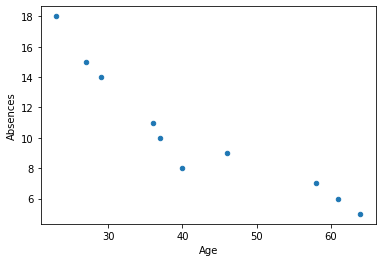

In [3]:
# Using Matplotlib library to plot scatter chart
abs_plot = absences.plot.scatter('Age', 'Absences')

# Relation: The bigger the age, the lower the absences.

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [4]:
# your code here
def slope(x,y):
    numerator = 0
    denominator = 0
    mu_x = sum(x)/len(x) #mean of x: ages
    mu_y = sum(y)/len(y) #mean of y: absences
    for i,j in zip(x,y):
        numerator += ((j-mu_y)*(i-mu_x))
        denominator += (i-mu_x)**2
    return numerator/denominator

def intercept(x,y,m):
    mu_x = sum(x)/len(x)
    mu_y = sum(y)/len(y)
    return mu_y - m*mu_x

#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

In [5]:
# Calculating slope

absences_slope = slope(absences['Age'], absences['Absences'])
absences_slope

-0.2681088337033404

In [6]:
# Calculating intercept

absences_intercept = intercept(absences['Age'], absences['Absences'], absences_slope)
absences_intercept

21.58738189891063

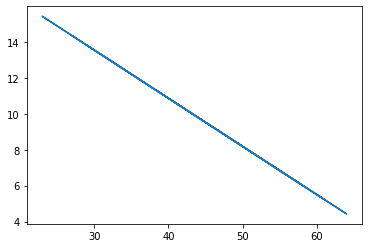

In [7]:
# for each value in x axis, assinging the value of a line function y = a*x + b

mpl.plot(absences['Age'], absences['Age']*absences_slope + absences_intercept)

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [8]:
# your code here
def cov(x, y):
    numerator = 0
    x_mean = sum(x)/ len(x)
    y_mean = sum(y)/ len(y)
    for i,j in zip(x,y):
        numerator += (i - x_mean) * (j - y_mean) 
    return numerator / len(x)

def correl(x,y):
    return cov(x,y) / (x.std() * y.std())

#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [9]:
# your code here
absences_cov = cov(absences['Age'], absences['Absences'])
absences_cov

-51.92999999999999

In [10]:
# your comments here
absences_correl = correl(absences['Age'], absences['Absences'])
absences_correl

-0.839289068323291

In [11]:
# The two values indicate a strong inverse dependence from each other, what makes sense according the plots seen above.

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [12]:
# your comments here
# In our sample, it is clear that the age can be an indicator of absenteeism. There is a strong correlation between
# this two variables, as inverse proportion. The older a person is, the less absences has.

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [13]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [27]:
# your code here
ib_cov = cov(ironbeers_df['X'],ironbeers_df['Y'])
ib_cov

10.5

In [28]:
ib_corr = correl(ironbeers_df['X'],ironbeers_df['Y'])
ib_corr

0.8548823683035951

In [15]:
# There is a strong correlation between X (people I told to stay) and Y (people actually stayed). And it is positive,
# which means the more people I tell to stay, the more people stay.
# However, the covariance is not so high and that could explain my sensation

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

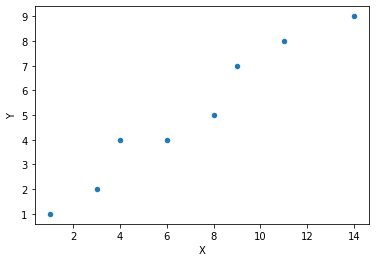

In [29]:
# your code here
ib_plot = ironbeers_df.plot.scatter('X', 'Y')

In [17]:
# As commented before, the correlation is positive, so the more people I tell to stay, the more actually stayed.

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

In [30]:
# your code here
ib_slope = slope(ironbeers_df['X'],ironbeers_df['Y'])
ib_slope

0.6363636363636364

In [32]:
ib_inter = intercept(ironbeers_df['X'],ironbeers_df['Y'], ib_slope)
ib_inter

0.5454545454545459

In [19]:
# The intercept at 0.545 makes no sense, but would indicate that even I don't invite anybody, 'half person' would 
# come to ironbeers. 
# The slope indicates that for each person I tell to stay, 0,64 will stay.

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [20]:
# The conclusion is that I'm not the reason why people is not staying on Fridays. We can see it in the other way:
# for each people I don't tell to stay, '0,64 people' won't stay.

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [21]:
# your code here

#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [22]:
# your code here

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [23]:
# your comments here

#### 4.- Remove the points with a high error and recalculate the regression line.

In [24]:
# your code here

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [25]:
# your code here

In [26]:
# your comments here